## **Step 1 - keywords Extraction**
***

We have two datasets, one with dream text descriptions:

In [ ]:
from keyword_extractor import read_datasets, extract_and_save_keywords_from_dataframes
from yaml_parser import load_config
config = load_config()
dream_df, keywords_df = read_datasets(config)
dream_df.head()

And another one with interpretations of dreams according to keywords:

In [ ]:
keywords_df.head()

Now, we will use pretrained LLMs in order to extract the given keywords from the keywords dataset , from the dream text description from the dream text dataset.

### **GPT2**
***

In [ ]:
extract_and_save_keywords_from_dataframes()

## Step 2 - Summarize interpretations

In [1]:
import pandas as pd

keywords_df = pd.read_csv("datasets/dreams_interpretations.csv")

In [2]:
keywords_df

,Dream Symbol,Interpretation
0,Aardvark,To see an aardvark in your dream indicates tha...
1,Abandonment,To dream that you are abandoned suggests that ...
2,Abduction,To dream of being abducted indicates that you ...
3,Aborigine,To see an Aborigine in your dream represents b...
4,Abortion,To dream that you have an abortion suggests th...
...,...,...
897,Yoyo,To see or play with a yoyo in you dream signif...
898,Zebra,To see a zebra in your dream represents perfec...
899,Zip\nLine,To dream that you are zip lining implies that ...
900,Zombie,To see or dream that you are a zombie suggests...


In [3]:
keywords_df["Dream Symbol"].nunique()

898

In [4]:
keywords_df.sample(10)

,Dream Symbol,Interpretation
716,Tall,To dream that you are taller than someone indi...
891,Yelling,To dream that you or someone is yelling repres...
648,Safety\nPin,To see a safety pin in your dream indicates th...
400,King,To see a king in your dream indicates that suc...
275,Halloween,To dream of Halloween signifies death and the ...
120,Cartwheels,To dream that you are doing cartwheels represe...
478,Manicure,To dream that you are getting a manicure repre...
224,Fasting,To dream that you are fasting represents self-...
666,Satan,To see Satan in your dream denotes that there ...
674,Sausage,To see or eat sausage in your dream symbolizes...


In [5]:

dream_df = pd.read_csv("datasets/rsos_dream_data.tsv", sep="\t")
dream_df.head()

,dream_id,dreamer,description,dream_date,dream_language,text_dream,characters_code,emotions_code,aggression_code,friendliness_code,...,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
0,1,alta,Alta: a detailed dreamer,1957,en,"The one at the Meads's house, where it's bigge...","2ISA, 1MKA, 1FDA, 1IOA, 2ISA",NaN,2IKA > Q,2IKA 4> Q,...,0.500000,0.000000,0.200000,0.200000,0.0,0.000,0.200000,0.200000,0.0,0.0
1,2,alta,Alta: a detailed dreamer,8/11/1967,en,I'm at a family reunion in a large fine house ...,"2ISA, people, 2ISA",SD 2IKA,"D > Q, Q > 2ISA",NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000,0.666667,0.000000,0.0,1.0
2,3,alta,Alta: a detailed dreamer,8/1/1985,en,I watch a plane fly past and shortly realize i...,"2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2ISA, 2FDA","SD 1ISA, AP D, AP D","It PRP >, It PRP >, D > 1FKA",NaN,...,0.333333,0.000000,0.000000,0.285714,0.0,1.000,0.428571,0.000000,0.0,1.0
3,4,alta,Alta: a detailed dreamer,1985?,en,Me pulling the green leaves and berries off so...,"1MAA, 1FMA, 2ISA, 2IKA, 1ANI, 1ANI, 1IOA, 2ISA...","SD 2ISA, SD D","Q > Q, 2ISA > Q, 2ISA > Q, D > 1MSA","1IKA 4> Q, 2ISA 4> 2ISA",...,0.666667,0.176471,0.142857,0.142857,0.0,1.000,0.235294,0.117647,0.0,1.0
4,5,alta,Alta: a detailed dreamer,1985?,en,I'm in a room that reminds me of (but definite...,"1IRA, 1MSA, 1ISA, 2ISA, 1ISA, 1IKA","AP D, AP D, AP 1MSA, CO D, SD D, AP D","1MSA > D, Q > Q, D > 2IKA, D > 2IKA, D > 1MSA,...",D 4> Q,...,1.000000,0.000000,0.166667,0.166667,0.0,0.875,1.333333,0.166667,0.0,1.0


<Axes: >

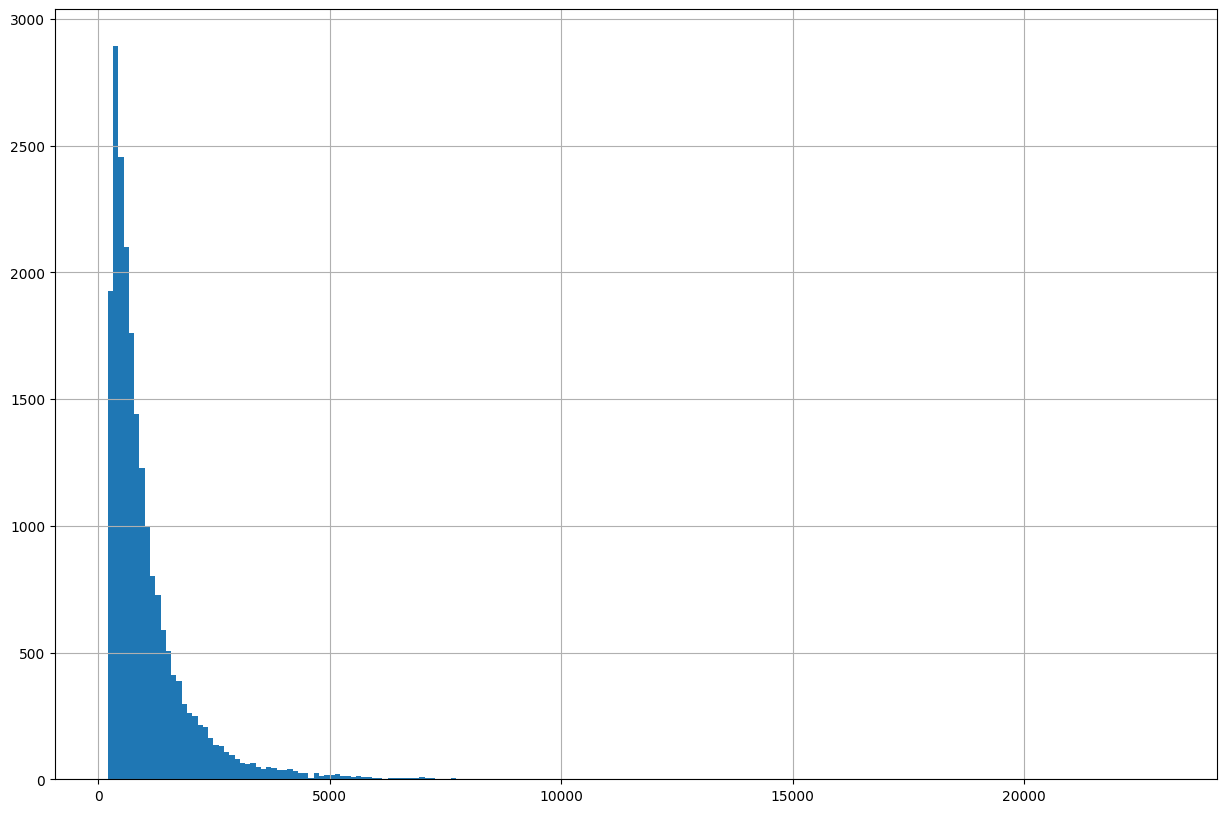

In [6]:
dream_df["text_dream"].str.len().hist( bins=200, figsize=(15, 10))

In [69]:
exmpl = dream_df[dream_df["text_dream"].str.len()< 500]

In [70]:
exmpl = exmpl["text_dream"].sample(10, random_state=42)

In [71]:
exmpl.str.len()

18552    267
8557     309
8751     292
18676    473
5605     394
1389     359
4379     343
17291    449
2968     362
10191    308
Name: text_dream, dtype: int64

In [ ]:
dataset = []

prmt = """Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream. """.replace("\n", " ")

rs = 42

for ex in exmpl:
    item = {
        "prompt": prmt, 
        "dream": ex,
        "symbols": r";\n".join(keywords_df["Interpretation"].sample(10, random_state=rs).values),
        }
    dataset.append(item)
    rs += 1
    

dataset = pd.DataFrame(dataset)
dataset


,prompt,dream,symbols
0,Given dream description and dream symbols belo...,I saw Seventec. It was a woman standing in a s...,To see a barrister with a white wig in your dr...
1,Given dream description and dream symbols belo...,I call one of my friends. I am in my old room ...,To dream that you are under narcosis is an ind...
2,Given dream description and dream symbols belo...,I had left my house and I was going down the s...,To see or eat jelly in your dream represents i...
3,Given dream description and dream symbols belo...,I was driving my car down a hill. There was sn...,To see a Barbie doll in your dream represents ...
4,Given dream description and dream symbols belo...,There is the theater. A man asks if there is a...,To see Harley Quinn in your dream points to an...
5,Given dream description and dream symbols belo...,Tyler and Jerome are in a bedroom together. Th...,To see or eat jelly in your dream represents i...
6,Given dream description and dream symbols belo...,I was in a floral shop and all these birds (bl...,To dream of fancy things indicates that you ar...
7,Given dream description and dream symbols belo...,I was among some girls about 10 years old. I w...,To see a weta in your dream signifies your fea...
8,Given dream description and dream symbols belo...,Two nuclear subs are fighting and are going to...,To see or viola in your dream represents your ...
9,Given dream description and dream symbols belo...,I went to some place with Dad and I ordered ch...,To dream of a baby shower suggests that you ar...


In [83]:
keywords_df["Interpretation"].sample(10)

290    To dream that you are doing a handstand refers...
709    To see a table in your dream represents social...
185    To see an electric fence in your dream indicat...
537    To see a lit oil lamp in your dream symbolizes...
761    To see an umbrella in your dream symbolizes em...
199    Emotions expressed in dreams are a way for you...
838    To receive a warning in your dream indicates t...
41     To see or eat a bagel in your dream  suggests ...
645    To dream that you are sad suggests that you ne...
778    To see urine in your dream represents the feel...
Name: Interpretation, dtype: object

In [84]:
dataset

,prompt,dream,symbols
0,Given dream description and dream symbols belo...,I saw Seventec. It was a woman standing in a s...,To see a barrister with a white wig in your dr...
1,Given dream description and dream symbols belo...,I call one of my friends. I am in my old room ...,To dream that you are under narcosis is an ind...
2,Given dream description and dream symbols belo...,I had left my house and I was going down the s...,To see or eat jelly in your dream represents i...
3,Given dream description and dream symbols belo...,I was driving my car down a hill. There was sn...,To see a Barbie doll in your dream represents ...
4,Given dream description and dream symbols belo...,There is the theater. A man asks if there is a...,To see Harley Quinn in your dream points to an...
5,Given dream description and dream symbols belo...,Tyler and Jerome are in a bedroom together. Th...,To see or eat jelly in your dream represents i...
6,Given dream description and dream symbols belo...,I was in a floral shop and all these birds (bl...,To dream of fancy things indicates that you ar...
7,Given dream description and dream symbols belo...,I was among some girls about 10 years old. I w...,To see a weta in your dream signifies your fea...
8,Given dream description and dream symbols belo...,Two nuclear subs are fighting and are going to...,To see or viola in your dream represents your ...
9,Given dream description and dream symbols belo...,I went to some place with Dad and I ordered ch...,To dream of a baby shower suggests that you ar...


In [85]:
from tqdm import tqdm

def batch_summarize(df, summarizer, batch_size=8, max_input_length=4096, max_output_length=1024, min_output_length=20):
    """
    Parameters:
        df (pd.DataFrame): must contain columns "prompt", "dream", "dream symbols"
        summarizer: transformers summarization pipeline
        batch_size (int): number of examples per summarization batch
        max_input_length (int): max length (in characters or tokens depending on tokenizer) for input truncation
        max_output_length (int): max number of tokens in the summary
        min_output_length (int): minimum number of tokens in the summary

    Returns:
        df (pd.DataFrame): same DataFrame with added column "interpretation"
    """
    interpretations = []

    for i in tqdm(range(0, len(df), batch_size), desc="Summarizing"):
        batch_df = df.iloc[i:i+batch_size]

        inputs = []
        for _, row in batch_df.iterrows():
            prompt = str(row["prompt"]).strip()
            dream =  "dream description: " + str(row["dream"]).strip()
            symbols = "dream symbols: " + str(row["symbols"]).strip()

            combined_input = f"{prompt}\n{dream}\n{symbols}"
            print(combined_input)
            inputs.append(combined_input[:max_input_length])  # character-level truncation

        outputs = summarizer(inputs, max_length=max_output_length, min_length=min_output_length, do_sample=False)
        summaries = [output["summary_text"] for output in outputs]
        interpretations.extend(summaries)

    df["interpretation"] = interpretations
    return df

In [86]:
from summarizer import load_summarizer

summarizer = load_summarizer()
result = batch_summarize(dataset, summarizer, batch_size=1)

result


Device set to use cuda:0
Summarizing:   0%|          | 0/10 [00:00<?, ?it/s]Your max_length is set to 1024, but your input_length is only 752. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=376)


Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream.
dream description: I saw Seventec. It was a woman standing in a show window among shoes. I saw a big man in bed. I saw a horse coming towards us. I was piloting an airplane. It was so simple. I saw a large plane take off and the pilot had it fly upside down as he walked on its surface.
dream symbols: To see a barrister with a white wig in your dream symbolizes wisdom and knowledge. The barrister may be a variation of the "wise old man" figure. You are looking for guidance and help in some area of your life.  Perhaps you are making an important decision.;\nTo see ferns in your dream symbolize your future hopes and fears. It also represent solitude.;\nTo see a landfill in your dream represents ideas that you have discarded. It also refers to rejected aspects of yourself or of someone's character. You may be trying to confront or come to terms with these

Summarizing:  10%|█         | 1/10 [00:00<00:03,  2.57it/s]Your max_length is set to 1024, but your input_length is only 636. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=318)


Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream.
dream description: I call one of my friends. I am in my old room in my home town, except it was in a new house by the beach. I had finals coming up, but it was such a nice day that I went outside. There was a beautiful tapestry monument. I went back inside as my friends came over to BBQ. I was happy and called everyone I knew.
dream symbols: To dream that you are under narcosis is an indication that you are trying to suppress your emotions instead of confronting them. You may be trying desperately to avoid a problem or situation in your waking life. Or you may be trying to refuse to take responsibility for your actions.;\nTo see or play with a yoyo in you dream signifies the ups and downs of your life. Alternatively, the dream indicates that you are not taking life's issues and problems seriously enough. You see things too trivially.;\nTo see a wall i

Summarizing:  20%|██        | 2/10 [00:00<00:03,  2.16it/s]Your max_length is set to 1024, but your input_length is only 860. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=430)


Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream.
dream description: I had left my house and I was going down the steps in back, when someone came and told me that the negroes had revolted. The rest of the dream I spent hiding from them. Interpretation I don't know Answers to questions 2. afraid3. actual participant4. unpleasant5. yard back of house6. no7. no
dream symbols: To see or eat jelly in your dream represents insight into a situation you have been wondering about. The dream may be a metaphor for something that is finally taking shape. You have come to some understanding. Alternatively, it indicates that you are preserving or maintaining a sweet relationship.;\nTo dream that something is rare indicates that you need to appreciate certain things. Consider the symbolism or significance of the rare object or event. Don't take things for granted.;\nTo dream that you are a hairdresser suggests tha

Summarizing:  30%|███       | 3/10 [00:01<00:03,  2.32it/s]Your max_length is set to 1024, but your input_length is only 644. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=322)


Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream.
dream description: I was driving my car down a hill. There was snow on the ground. It stalled by Elyria garage and I let it park in front of the door, blocking it. I had to go to work, so I left it there. After work I came there and didn't see the car. I went into the garage and it was there. I told Joe to fix it. When he opened the trunk door, the trunk was full of ashes. He told me to take out the ashes, so I got a shovel and went to work. He showed me the rusted body with holes in it.
dream symbols: To see a Barbie doll in your dream represents society's ideals.  You may feel that you are unable to meet the expectations of others.  Alternatively, the Barbie doll refers to the desire to escape from daily responsibilities. It may serve to bring you back to your childhood where life was much simpler and more carefree.;\nTo see or dream that you have a

Summarizing:  40%|████      | 4/10 [00:01<00:02,  2.43it/s]Your max_length is set to 1024, but your input_length is only 623. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=311)


Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream.
dream description: There is the theater. A man asks if there is a donut shop nearby and where. I tell him where and he goes. A woman comes by and asks the same question. I lead her halfway there and she goes the rest of the way. Before long I hear her frantic screams for help. I know that the man I talked to earlier is to blame. Swallowing my fear, I run in the direction of her screams, also shouting for help.
dream symbols: To see Harley Quinn in your dream points to an unhealthy, abusive relationship. Alternatively, the dream may indicate that you are blind to something that everyone else is clearly seeing. You are living in your own reality.;\nTo see your own elbow in your dream indicates that you need to make a space for yourself. Your dream may express hesitance or fear in creating your own space for fear of being scrutinized. Alternatively, the 

Summarizing:  50%|█████     | 5/10 [00:02<00:01,  2.61it/s]Your max_length is set to 1024, but your input_length is only 705. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=352)


Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream.
dream description: Tyler and Jerome are in a bedroom together. They are breaking up, arguing and upset. I interrupt them because Grandma Mildred has requested shaving equipment so she can shave Grandpa Lloyd. I ask if I can borrow one from them. They are very annoyed with me and glare, but Tyler gives me his mug and straight razor. I am concerned if Grandma can use it safely.
dream symbols: To see or eat jelly in your dream represents insight into a situation you have been wondering about. The dream may be a metaphor for something that is finally taking shape. You have come to some understanding. Alternatively, it indicates that you are preserving or maintaining a sweet relationship.;\nTo dream that you are playing an online game indicates that you are trying to escape from the stresses in your daily life. You want to be someone else. You want to be i

Summarizing:  60%|██████    | 6/10 [00:02<00:01,  2.43it/s]Your max_length is set to 1024, but your input_length is only 740. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=370)


Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream.
dream description: I was in a floral shop and all these birds (blue jays) came in and started eating the flowers. The store owner came in and started screaming. Then I woke up. Setting: An old store that sold flowers. Characters: An old female store owner, blue jays, and myself. Feelings and Thoughts: Other. I felt kind of startled when she came out screaming.
dream symbols: To dream of fancy things indicates that you are putting up a facade and hiding your true self. You are trying to divert attention to unimportant things.;\nTo see the jaws of an animal in your dream indicate a misunderstanding. It may also mean that you are rushing into things. Alternatively, the dream suggests that someone or some situation is taking a large bite of your time, energy or some aspect of yourself.;\nTo dream of a war signifies disorder and chaos in your waking life Y

Summarizing:  70%|███████   | 7/10 [00:02<00:01,  2.36it/s]Your max_length is set to 1024, but your input_length is only 569. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=284)


Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream.
dream description: I was among some girls about 10 years old. I was tempted to touch them sexually. A plastic balloon shaped like a crotch was by me, and I felt it. I was dismayed because I had been tempted. I wanted to convince the doctors at the hospital where I was confined that I could control myself if they released me. I said to a doctor, "Is that why you won't let me go?" I pondered deeply on how I could rechannel my mental energy toward creative endeavors.
dream symbols: To see a weta in your dream signifies your fear of the unknown. Sometimes what you don't know is a source of anxiety and stress. You are worrying too much about minor issues.  Alternatively, dreaming of a weta represents your roots.;\nTo see a yak in your dream represents your uniqueness and dependability. The yak may also be a pun on "yakking" too much. Maybe you should stop 

Summarizing:  80%|████████  | 8/10 [00:03<00:00,  2.49it/s]Your max_length is set to 1024, but your input_length is only 715. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=357)


Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream.
dream description: Two nuclear subs are fighting and are going to blow. I start running away so I can escape radiation fallout. I run toward the coast range, up and up and up. Then I'm running up a narrow stairs to an attic. Something scary is after me. I lock the two doors on the stairwell and hide under debris in the attic near a window where I can look out and see the danger.
dream symbols: To see or viola in your dream represents your deeper, darker and more melancholy feelings.;\nTo see an electricity tower in your dream symbolizes a distribution of power. You do not need to always be in full control. You need to delegate responsibilities and duties. Alternatively, the dream symbolizes industry and modernity.;\nTo dream that you are at a farmer's market suggests that you are looking for spiritual enrichment from a higher source.;\nTo dream that y

Summarizing:  90%|█████████ | 9/10 [00:03<00:00,  2.59it/s]Your max_length is set to 1024, but your input_length is only 500. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=250)


Given dream description and dream symbols below, 
Explain what this dream means. 
Use the dream symbols to help you interpret the dream.
dream description: I went to some place with Dad and I ordered chocolate chip pancakes with chocolate sauce (which meant chocolate ice-cream). When it was delivered it was a small piece of something and it had corn in it. I said I couldn't complain and Dad wouldn't complain for me. There was something to do with David Anders.
dream symbols: To dream of a baby shower suggests that you are welcoming a new start. You are given a chance to start over again and do things differently this time around. You have a new found faith in life itself.;\nTo see yourself in your dream is a reflection of how you act and behave in your waking life. Consider what you are doing and how you are feeling in the dream for additional significance.;\nTo dream that you are playing an online game indicates that you are trying to escape from the stresses in your daily life. You w

Summarizing: 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]


,prompt,dream,symbols,interpretation
0,Given dream description and dream symbols belo...,I saw Seventec. It was a woman standing in a s...,To see a barrister with a white wig in your dr...,Use the dream symbols to help you interpret t...
1,Given dream description and dream symbols belo...,I call one of my friends. I am in my old room ...,To dream that you are under narcosis is an ind...,To dream that you are under narcosis is an in...
2,Given dream description and dream symbols belo...,I had left my house and I was going down the s...,To see or eat jelly in your dream represents i...,Given dream description and dream symbols bel...
3,Given dream description and dream symbols belo...,I was driving my car down a hill. There was sn...,To see a Barbie doll in your dream represents ...,To see a Barbie doll in your dream represents...
4,Given dream description and dream symbols belo...,There is the theater. A man asks if there is a...,To see Harley Quinn in your dream points to an...,Use the dream symbols to help you interpret t...
5,Given dream description and dream symbols belo...,Tyler and Jerome are in a bedroom together. Th...,To see or eat jelly in your dream represents i...,Use the dream symbols to help you interpret t...
6,Given dream description and dream symbols belo...,I was in a floral shop and all these birds (bl...,To dream of fancy things indicates that you ar...,Use the dream symbols to help you interpret t...
7,Given dream description and dream symbols belo...,I was among some girls about 10 years old. I w...,To see a weta in your dream signifies your fea...,Use the dream symbols to help you interpret t...
8,Given dream description and dream symbols belo...,Two nuclear subs are fighting and are going to...,To see or viola in your dream represents your ...,Given dream description and dream symbols bel...
9,Given dream description and dream symbols belo...,I went to some place with Dad and I ordered ch...,To dream of a baby shower suggests that you ar...,Given dream description and dream symbols bel...


In [87]:
result.to_html("datasets/dream_interpretations.html", index=False)

In [29]:
len(results[0])

362

In [30]:
results

[' To dream of an abyss signifies an obstacle that is creating much anxiety for you . To dream that you are at a factory represents repetitious thinking and an old way of doing things . To see a baby carriage in your dream symbolizes your desire for a family or longing for a baby . If the baby carriage is empty, then it indicates sadness or an unfulfilled goal .',
 ' Dream symbols: To dream that you have a house with an open floor plan or an open layout suggests that you need to work on integrating aspects of yourself . Dream that you are getting a demotion at work indicates a lack of self-esteem and confidence . Dreaming about your vagina in your dream means fertility, life, softness and warmth .',
 ' Use the dream symbols to help you interpret the dream . To dream you are abusing someone suggests that your past actions will come back to haunt you . Alternatively, the dream refers to your unwise choices or your fear of confrontation .',
 ' Use the dream symbols to help you interpret t